In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt


In [2]:
h_DM = np.load("darkmatter_1000GeV.pkl", allow_pickle = True, encoding='latin1')
h_DM_errors2 = np.load("darkmatter_1000GeV_errors2.pkl", allow_pickle = True, encoding='latin1')

hatmos = np.load("atmos.pkl", allow_pickle = True, encoding='latin1')
hatmos_errors2 = np.load("atmos_errors2.pkl", allow_pickle = True, encoding='latin1')

hastro = np.load("astro.pkl", allow_pickle = True, encoding='latin1')
hastro_errors2 = np.load("astro_errors2.pkl", allow_pickle = True, encoding='latin1')

hcorsika = np.load("corsika.pkl", allow_pickle = True, encoding='latin1')
hcorsika = np.load("corsika_errors2.pkl", allow_pickle = True, encoding='latin1')


rateDM = np.sum(h_DM[0])
rateCorsika = np.sum(hcorsika[0])
rateAstro = np.sum(hastro[0])
rateAtmos = np.sum(hatmos[0])

livetime      = 28272940. + 30674072. + 31511810.5 + 31150852. + 30059465.

total_events = np.int(livetime*(rateCorsika + rateAtmos + rateAstro))

print ("Total number of events {:d}".format(total_events))

fraction_astro  = rateAstro / (rateCorsika + rateAtmos + rateAstro)
fraction_atmos  = rateAtmos / (rateCorsika + rateAtmos + rateAstro)

print ("Fraction of astro {:.2f}".format(fraction_astro))
print ("Fraction of atmos {:.2f}".format(fraction_atmos))

print (rateDM * livetime)


Total number of events 18994
Fraction of astro 0.09
Fraction of atmos 0.91
1096.2127281167714


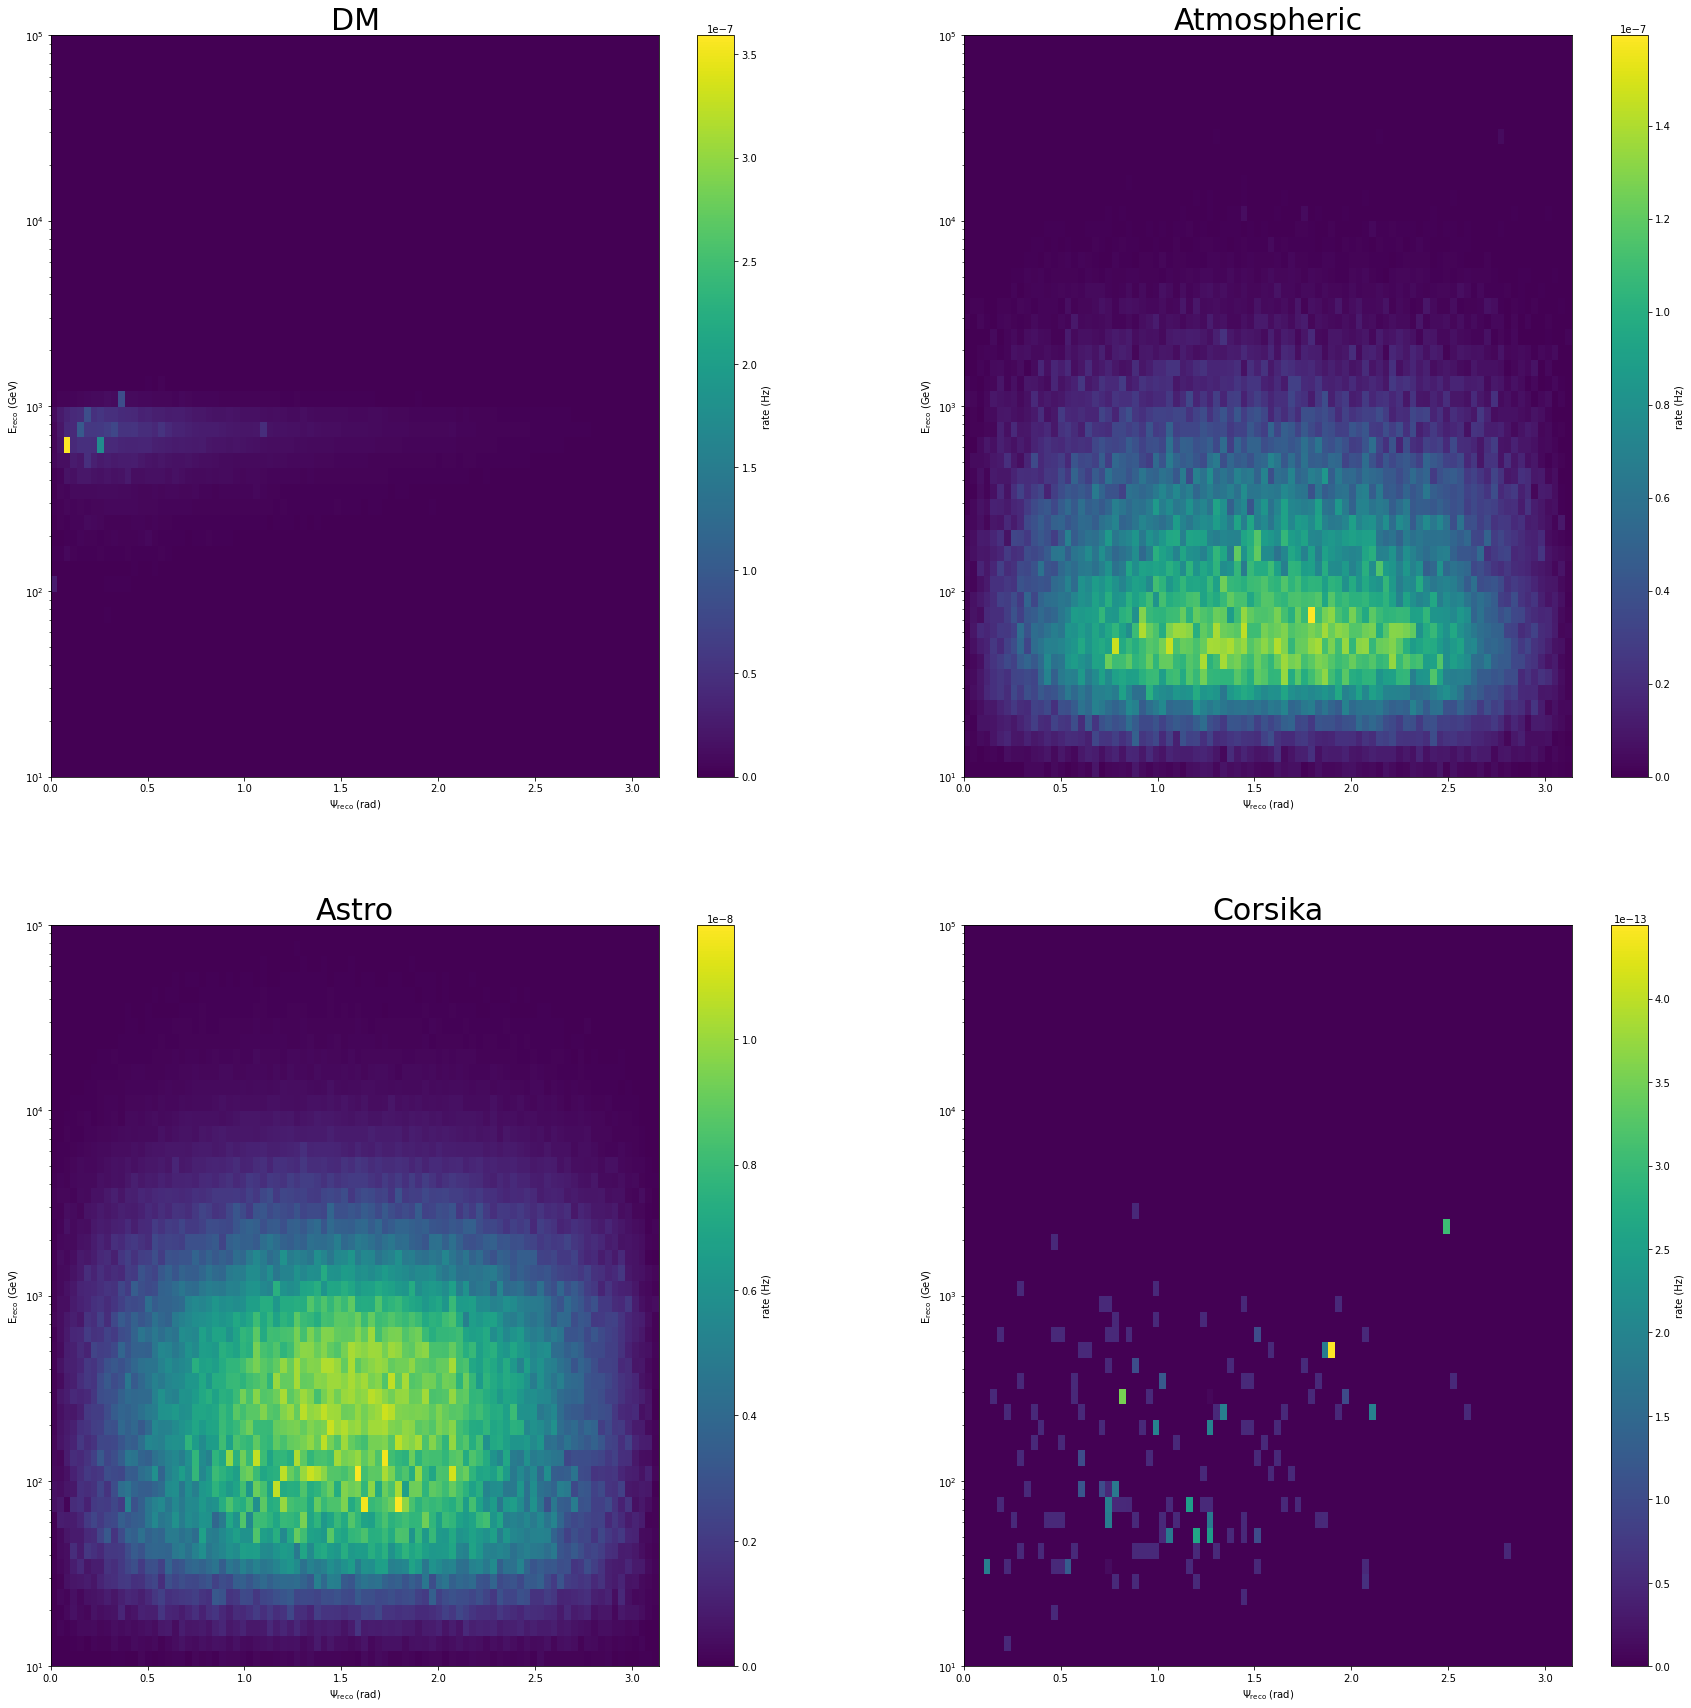

In [3]:
fig,axs = plt.subplots(2,2,figsize=(30,30))
pcm = axs[0,0].pcolormesh(h_DM[2],h_DM[1],h_DM[0])
fig.colorbar(pcm, ax=axs[0,0], label='rate (Hz)')
axs[0,0].set_title("DM", fontsize=30)
axs[0,0].set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
axs[0,0].set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
axs[0,0].set_yscale('log')

pcm = axs[0,1].pcolormesh(hatmos[2],hatmos[1],hatmos[0])
fig.colorbar(pcm, ax=axs[0,1], label='rate (Hz)')
axs[0,1].set_title("Atmospheric", fontsize=30)
axs[0,1].set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
axs[0,1].set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
axs[0,1].set_yscale('log')

pcm = axs[1,0].pcolormesh(hastro[2],hastro[1],hastro[0])
fig.colorbar(pcm, ax=axs[1,0], label='rate (Hz)')
axs[1,0].set_title("Astro", fontsize=30)
axs[1,0].set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
axs[1,0].set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
axs[1,0].set_yscale('log')


pcm = axs[1,1].pcolormesh(hcorsika[2],hcorsika[1],hcorsika[0])
fig.colorbar(pcm, ax=axs[1,1], label='rate (Hz)')
axs[1,1].set_title("Corsika", fontsize=30)
axs[1,1].set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
axs[1,1].set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
axs[1,1].set_yscale('log')

In [4]:
shape = h_DM[0].shape

In [5]:
from modeling import PdfBase, Model, Parameter



In [6]:
SignalPDF = PdfBase(h_DM[0].flatten()/np.sum(h_DM[0].flatten()), name="SignalPDF")
AtmosPDF = PdfBase(hatmos[0].flatten()/np.sum(hatmos[0].flatten()), name="AtmosPDF")
CorsikaPDF = PdfBase(hcorsika[0].flatten()/np.sum(hcorsika[0].flatten()), name="CorsikaPDF")
AstroPDF = PdfBase(hastro[0].flatten()/np.sum(hastro[0].flatten()), name="AstroPDF")




In [7]:
from argparse import Namespace

truth = Namespace(f_sig= 0, f_atmos = fraction_atmos, f_astro = fraction_astro)

nsig = Parameter(value=truth.f_sig, limits=(0,1), fixed=False, name="f_sig")
natmos = Parameter(value=truth.f_atmos, limits=(0,1), is_nuisance = True, fixed=False, name="f_atmos")
nastro = Parameter(value=truth.f_astro, limits=(0,1), is_nuisance = True, fixed=False, name="f_astro")



In [8]:
nsig.scale = 0.01
nsig.factor_limits

array([  0., 100.])

In [86]:

model = nsig * SignalPDF + (1 - nsig) * (natmos * AtmosPDF + nastro * AstroPDF + (1 - nastro - natmos)*CorsikaPDF)
#model =  (1 - (nastro + natmos) )# *CorsikaPDF

null_model = (natmos * AtmosPDF + nastro * AstroPDF + (1 - nastro - natmos)*CorsikaPDF)


Parameter f_astro already exists in the model, it won't be added again
Parameter f_atmos already exists in the model, it won't be added again
Parameter f_sig already exists in the model, it won't be added again
Parameter f_astro already exists in the model, it won't be added again
Parameter f_atmos already exists in the model, it won't be added again


In [87]:
print(null_model)
print ("-------------")
print(model)

 Model: f_atmos*AtmosPDF + f_astro*AstroPDF + (1-f_astro - f_atmos) * CorsikaPDF
 Number of pdf: 3
 - AtmosPDF
 - AstroPDF
 - CorsikaPDF
 Number of parameters: 2
 Name: f_atmos, Value: 0.93, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True
 Name: f_astro, Value: 0.07, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True
-------------
 Model: f_sig*SignalPDF + (1-f_sig)*(f_atmos*AtmosPDF + f_astro*AstroPDF + (1-f_astro - f_atmos) * CorsikaPDF)
 Number of pdf: 4
 - SignalPDF
 - AtmosPDF
 - AstroPDF
 - CorsikaPDF
 Number of parameters: 3
 Name: f_sig, Value: 0.00, Scale: 1.0e-02, Limits: (0.0, 1.0), Fixed: False, Is nuisance? False
 Name: f_atmos, Value: 0.93, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True
 Name: f_astro, Value: 0.07, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True


In [88]:
from data import DataSet
from llh import LikelihoodRatioTest

dict_values([<modeling.model.Model object at 0x112e99950>, <modeling.model.Model object at 0x112e99a50>])

In [89]:
model.parameters["f_sig"].value = 0.002
ds = DataSet()
ds.sample(total_events, null_model)
print (ds)

DataSet type simulation
Total number of events: 18971


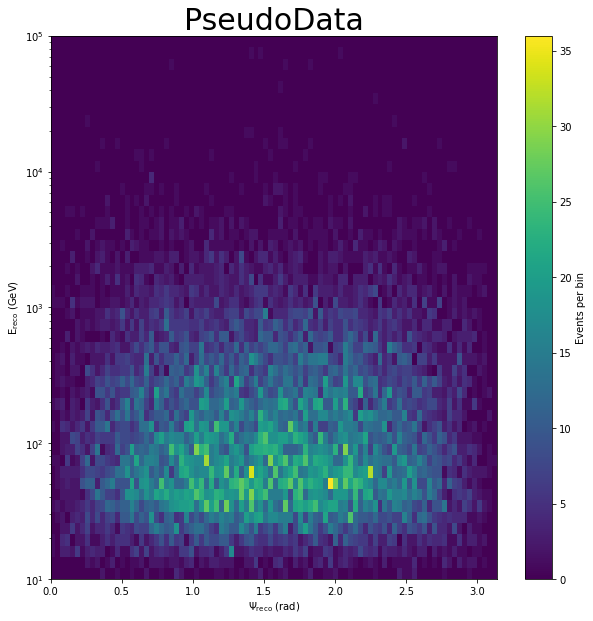

In [90]:
fig,axs = plt.subplots(1,1,figsize=(10,10))

pcm = axs.pcolormesh(hcorsika[2],hcorsika[1],np.reshape(ds.values, shape))
fig.colorbar(pcm, ax=axs, label='Events per bin')
axs.set_title("PseudoData", fontsize=30)
axs.set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
axs.set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
axs.set_yscale('log')


In [91]:
lr = LikelihoodRatioTest(model = model, null_model = null_model)

In [92]:
lr.data = ds

In [93]:
%%time
lr.fit_H0()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -2.413e+04                 │        Ncalls = 75 (75 total)        │
│ EDM = 0.00087 (Goal: 0.0001)     │               up = 0.5               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
CPU times: user 174 ms, sys: 8.61 ms, total: 182 ms
Wall time: 193 ms


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -2.413e+04                 │        Ncalls = 75 (75 total)        │
│ EDM = 0.00087 (Goal: 0.0001)     │               up = 0.5               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ f_atmos │ 930.04e-3 │  0.23e-3  │            │            │    0    │    1    │       │
│ 1 │ f_astro │ 71.23e-3  │  0.23e-3  │            │            │    0    │    1    │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [94]:
%time
lr.fit_H1()

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs
┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -2.413e+04                 │       Ncalls = 147 (147 total)       │
│ EDM = 9.69e-05 (Goal: 0.0001)    │               up = 0.5               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -2.413e+04                 │       Ncalls = 147 (147 total)       │
│ EDM = 9.69e-05 (Goal: 0.0001)    │               up = 0.5               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ f_sig   │   0.000   │   0.018   │            │            │    0    │   100   │       │
│ 1 │ f_atmos │ 930.11e-3 │  0.20e-3  │            │            │    0    │    1    │       │
│ 2 │ f_astro │ 71.16e-3  │  0.20e-3  │            │            │    0    │    1    │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

%%time
params = [0., 0.9, 0.1]

for z, p in zip(iter(model._parameters.values()), params):
    z.value = p
    
mask = np.where(model[:] > 0)

logs = np.asarray(list(map(nb_log, ds.ntotal * np.asarray(model[mask]))))

values2 = ds.values[mask] * logs - ds.ntotal*model[mask]

llh = -nb_sum(values2)
print(values2)
print (llh)

%%time
params = [0., 0.9, 0.1]

for z, p in zip(iter(model._parameters.values()), params):
    z.value = p
    
mask = np.where(model[:] > 0)

logs = np.asarray(list(map(np.log, ds.ntotal * np.asarray(model[mask]))))

values2 = ds.values[mask] * logs - ds.ntotal*model[mask]

llh = -np.sum(values2)
print(values2)
print (llh)

%%time

params = Namespace([0., 0.9, 0.1]

for z, p in zip(iter(model._parameters.values()), params):
    z.value = p
    
mask = np.where(model[:] > 0)
values = [ds.values[i] * np.log(ds.ntotal*m)-ds.ntotal*m for i, m in enumerate(model[mask])]
      
#print(values)  
llh2 = -np.sum(values)



In [95]:
fit_parameters  = list(lr.models["H1"].parameters.values())

for p in fit_parameters:
    print (p.name, p.value)
    

f_sig 3.577713181268649e-09
f_atmos 0.9301141091687074
f_astro 0.07113882008826172


In [96]:
fit_parameters[0]

### Let's implement an upper limit estimator

In [101]:
conf_level = 90.

lr._minimizers["H1"].print_level = 0

nIterations = 0
eps_TS = 0.005
eps_param = 0.1

deltaTS = 2.71
if conf_level==90:
    deltaTS = 1.64
elif conf_level==95:
    deltaTS = 2.71

    
param_low = fit_parameters[0].factor
param_up = param_low
param_mean = param_low
        
    
dTS = 0
cc = 1

y = []
x = []

while((dTS < deltaTS) and (nIterations<100)):
    nIterations += 1 

    param_up = param_up + 5.*np.abs(param_up)

    print ("Param_up ", param_up)
    
    #We fix the signal to param_up in the H1
    
    lr.minimizers["H1"].fixed["f_sig"] = True
    lr.minimizers["H1"].values["f_sig"] = param_up
    lr.fit_H1()
    

    if param_up < 0.:
        TS_fix = 0.
    else:
        TS_fix = lr.TS

    dTS = fTS - TS_fix

   # print (dTS)
    y.append(dTS)
    
    x.append(param_up*fit_parameters[0].scale)

nIterations = 0
   
param_low = param_up/4.
    
while((cc>0.)  and (nIterations<100)):
            
    nIterations += 1

    param_mean=(param_low+param_up)/2.

    x.append(param_mean*fit_parameters[0].scale)
        #We fix the signal to param_up in the H1
    
    print ("Param_mean ", param_mean)
    
    lr._minimizers["H1"].fixed["f_sig"] = True
    lr._minimizers["H1"].values["f_sig"] = param_mean
    lr.fit_H1()
    
        
    if param_mean <0.:
        TS_fix = 0.
    else:
        TS_fix = lr.TS
                        
    dTS = fTS - TS_fix
    y.append(dTS)
        
    if(dTS<deltaTS):

        param_low=param_mean
        delta_param=(param_up-param_low)/(param_up)
                   
                
        if((dTS>deltaTS-eps_TS) and (delta_param < eps_param)):
            cc = 0
                    
    if(dTS>deltaTS):
        param_up=param_mean
        delta_param=(param_up-param_low)/(param_up)
                
        if((dTS<deltaTS+eps_TS) and (delta_param < eps_param)):
            cc=0
                    
print (param_up * fit_parameters[0].scale, nIterations)

Param_up  3.219941863141784e-06
Param_mean  2.012463664463615e-06
Param_mean  1.4087245651245306e-06
Param_mean  1.1068550154549883e-06
Param_mean  9.559202406202172e-07
Param_mean  8.804528532028316e-07
Param_mean  8.427191594941388e-07
Param_mean  8.238523126397924e-07
Param_mean  8.144188892126192e-07
Param_mean  8.097021774990327e-07
Param_mean  8.073438216422394e-07
Param_mean  8.061646437138427e-07
Param_mean  8.055750547496444e-07
Param_mean  8.052802602675452e-07
Param_mean  8.051328630264956e-07
Param_mean  8.050591644059708e-07
Param_mean  8.050223150957084e-07
Param_mean  8.050038904405773e-07
Param_mean  8.049946781130117e-07
Param_mean  8.049900719492289e-07
Param_mean  8.049877688673374e-07
Param_mean  8.049866173263917e-07
Param_mean  8.049860415559189e-07
Param_mean  8.049857536706825e-07
Param_mean  8.049856097280643e-07
Param_mean  8.049855377567552e-07
Param_mean  8.049855017711006e-07
Param_mean  8.049854837782733e-07
Param_mean  8.049854747818596e-07
Param_mean  8.

In [102]:
print (param_up, upper_limit)

8.04985465785446e-07 0.1652085743243449


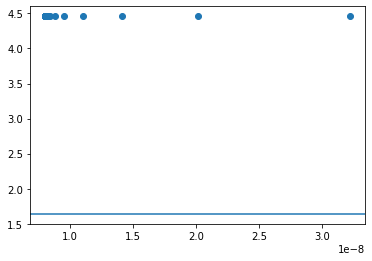

In [103]:
fig, ax = plt.subplots(1,1)
ax.plot(x, y, 'o')
ax.axhline(y=deltaTS)

In [104]:
lr.minimizers["H1"].fixed["f_sig"] = False
lr.minimizers["H1"].values["f_sig"] = param_up
lr.fit_H1()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -2.413e+04                 │       Ncalls = 84 (1847 total)       │
│ EDM = 0.000306 (Goal: 0.0001)    │               up = 0.5               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ f_sig   │   0.000   │   0.018   │            │            │    0    │   100   │       │
│ 1 │ f_atmos │ 930.11e-3 │  0.23e-3  │            │            │    0    │    1    │       │
│ 2 │ f_astro │ 71.16e-3  │  0.22e-3  │            │            │    0    │    1    │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

(array([-0.03586873, -0.033395  , -0.03092127, -0.02844755, -0.02597382,
        -0.02350009, -0.02102636, -0.01855264, -0.01607891, -0.01360518,
        -0.01113145, -0.00865772, -0.006184  , -0.00371027, -0.00123654,
         0.00123719,  0.00371091,  0.00618464,  0.00865837,  0.0111321 ,
         0.01360583,  0.01607955,  0.01855328,  0.02102701,  0.02350074,
         0.02597446,  0.02844819,  0.03092192,  0.03339565,  0.03586938]),
 array([-24134.84794896, -24134.84794896, -24134.84794896, -24134.84794896,
        -24134.84794896, -24134.84794896, -24134.84794896, -24134.84794896,
        -24134.84794896, -24134.84794896, -24134.84794896, -24134.84794896,
        -24134.84794896, -24134.84794896, -24134.84794896, -24134.81361653,
        -24134.74477963, -24134.67569023, -24134.60634922, -24134.53675747,
        -24134.46691587, -24134.39682527, -24134.32648654, -24134.25590052,
        -24134.18506808, -24134.11399006, -24134.04266728, -24133.97110058,
        -24133.89929078, -24

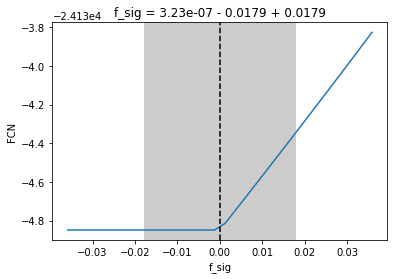

In [105]:
lr._minimizers["H1"].draw_mnprofile("f_sig")

In [107]:
print (model)

 Model: f_sig*SignalPDF + (1-f_sig)*(f_atmos*AtmosPDF + f_astro*AstroPDF + (1-f_astro - f_atmos) * CorsikaPDF)
 Number of pdf: 4
 - SignalPDF
 - AtmosPDF
 - AstroPDF
 - CorsikaPDF
 Number of parameters: 3
 Name: f_sig, Value: 0.00, Scale: 1.0e-02, Limits: (0.0, 1.0), Fixed: False, Is nuisance? False
 Name: f_atmos, Value: 0.93, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True
 Name: f_astro, Value: 0.07, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True


In [33]:
n_trials = 10
lr._minimizers[0].print_level = 0
lr._minimizers[1].print_level = 0

In [34]:
%%time
ds.sample(total_events, null_model)

CPU times: user 834 ms, sys: 12.7 ms, total: 846 ms
Wall time: 863 ms


In [39]:



def compute(n_trials):
    print (n_trials)
    lr._minimizers[1].print_level = 0
    lr._minimizers[0].print_level = 0
    
    n_h = 0
    n_m = 0
    m_lus = []
    xs = []

    n_data = []
    for n in range(n_trials):
        ds.sample(total_events, null_model)
        lr.data = ds

        lr.fit_H0()
        lr.fit_H1()

        if not lr._minimizers[0].valid:
            continue
        if not lr._minimizers[1].valid:
            continue

        try:
            lr._minimizers[1].minos("f_sig", sigma = 1)


            #if lr._minimizers[1].merrors["f_sig"].is_valid:
            #    break


        except Exception as e:
            print(f"exception in n={n}")
            print(e)

        x = lr._minimizers[1].values["f_sig"]
        me = lr._minimizers[1].merrors["f_sig"]
        m_lu = x + me.lower, x + me.upper

        print (m_lu)
        if m_lu[0] < truth.f_sig < m_lu[1]:
            n_m += 1
        xs.append(x)
        
        m_lus.append(m_lu)
        n_data.append(n)

    x = np.mean(xs)
    m_l, m_u = np.mean(m_lus, axis=0)
    return x, m_l, m_u, n_m




In [44]:
trials = np.arange(1, 100, 10)

In [45]:
x, m_l, m_u, n_m = np.transpose([t for t in map(compute, trials)])

1
(-0.0002615360997137717, 0.00022559985734753863)
11
(-0.0006380048223625367, 0.0003165557062640651)
(-0.002529161845050032, 0.00044493025267408533)
(0.0, 0.0002788526402859785)
(7.380923958551244e-06, 0.001048687209823674)
(-0.0001681558524936344, 0.00015675356505068794)
(-0.00016485030719490257, 0.00014958424886425925)
(0.0, 0.0008646910881159821)
(0.0, 0.0007058731035015662)
(-0.0016401296487898454, 0.0004942825965632003)
(-0.0002507361769281957, 0.00021331038054300214)
(0.0, 0.0010516479924666234)
21
(-0.0004954032585806345, 0.00030462545722031114)
(-0.00016712394484000304, 0.00015821366948814722)
(0.00015425633138016416, 0.0013199465415045994)
(-0.0001374053439806011, 0.00024372538800393904)
(-0.0002141735108777132, 0.00018911928408067496)
(-0.00021630195794700158, 0.00024315872917575476)
(-0.00021008741977260326, 0.00017401186028797165)
(0.0, 0.0006158536940268136)
(-9.066513280622801e-05, 8.943344240908147e-05)
(9.458096895347977e-06, 0.0006624500404310601)
(-0.0002784288130516

(0.0, 0.0007340282056628759)
(0.0, 0.00023848841132916075)
(-0.0008285356029341662, 0.0003648048614397368)
(-0.00011081180859362494, 0.00010872957618865679)
(-0.00011102062969423065, 0.0001191980581830258)
(-0.0006295557330947554, 0.000361726313734097)
(-0.00022025976961242977, 0.00019996813836469285)
(-0.0003021775265191762, 0.00024578818901391285)
(-0.0003401667829312782, 0.0002654454196596052)
(-0.00014082682563437698, 0.00013602790611714187)
(-0.0001326491879447833, 0.0001290629535250602)
(-0.0002223947684547034, 0.00018675246089386522)
(-0.00022235062119657645, 0.00045028691636948826)
(0.0, 0.0007250644046864248)
(0.0, 0.0002922762613071291)
(-0.00025107426575907144, 0.00020695991077969395)
(-9.891483800844592e-05, 9.766544315292197e-05)
(0.00029153191262239317, 0.001156937064164034)
(-0.0005511140643713608, 0.0003329925900806555)
(-0.0005455657562739302, 0.0002621541469822847)
71
(0.0, 0.0005151889383564743)
(-0.0003135532685100695, 0.0002511561020906956)
(0.0, 0.0007282322756703

(-0.00011072770643480445, 0.0001008991374727542)
(0.0, 0.000564812693461473)
(-0.00011759151341941831, 0.00011288723122911701)
(-0.0008096652285164152, 0.00035402200669365746)
(9.476617259724805e-05, 0.0006772627879522942)
(7.56132828268104e-05, 0.0007000074103498667)
(0.0, 0.0005848210610886009)
(-7.932232143875728e-05, 7.851222161698255e-05)
(0.0, 0.0001696985891570387)
(-9.680819835772292e-05, 9.207173908077269e-05)
(-8.993255530156952e-05, 8.719985604944184e-05)
(-7.331163782986483e-05, 7.331164230117704e-05)
(0.0, 0.0004590008899020536)
(-0.00037513403606534435, 0.00019597462274544393)
(6.921370126240843e-05, 0.0006986724737933347)
(1.6561752090333052e-05, 0.0007149880822976279)
(0.0, 0.0002807129485046971)
(-9.427830600952647e-05, 9.183400331322085e-05)
(-0.0001167246137417921, 0.00011059400078065026)
(-0.00017163763569835733, 0.00014718863339234058)
(0.0, 0.00032369912108743445)
(-0.0006739948986238808, 0.0002456435598603965)
(-0.0005213426348712469, 0.00031559999197556686)
(-0.

In [46]:
n_m

array([ 1.,  6., 13., 15., 19., 25., 40., 36., 48., 55.])

(0.0, 1.0)

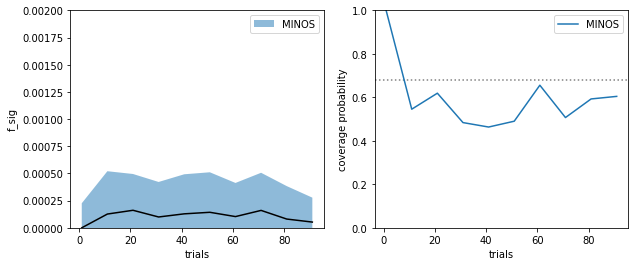

In [47]:

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plt.sca(ax[0])
plt.fill_between(trials, m_l, m_u, alpha=0.5, label="MINOS")
plt.plot(trials, x, "-k")
plt.legend()
plt.xlabel("trials")
plt.ylabel("f_sig")
plt.ylim(0, 0.002)
#plt.semilogx();
plt.sca(ax[1])
plt.plot(trials, n_m/trials, label="MINOS")
plt.axhline(0.68, ls=":", color="0.5", zorder=0)
plt.xlabel(r"trials")
plt.ylabel("coverage probability")
plt.legend()
plt.ylim(0, 1)
#plt.semilogx();

ValueError: Axes instance argument was not found in a figure

In [59]:
%%time
ev = sample(total_events, null_model)

CPU times: user 753 ms, sys: 11.6 ms, total: 765 ms
Wall time: 784 ms


In [58]:
%%time 
ev = sample2(total_events, null_model)

CPU times: user 763 ms, sys: 13.8 ms, total: 776 ms
Wall time: 808 ms
